### PCA-copy

In [24]:
# Import Library
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [25]:
# Set Config
CONFIG = {
    "data_dir": "./data_1.csv"
    , "color": sns.diverging_palette(255, 10, l=50, s=100, n=40, center="dark")
    , "cbar": {"shrink": 0.8}
    , "adopted_comp": 2
}

In [26]:
# Load Data
df = pd.read_csv(CONFIG['data_dir'], index_col=0).T
df

GeneSymbol,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2M-AS1,A2ML1,A2MP1,A2MP1,A2MP1,...,ZXDC,ZXDC,ZYG11A,ZYG11A,ZYG11B,ZYG11B,ZYX,ZZEF1,ZZZ3,ZZZ3
HCE-group1,1.000056,0.966142,1.394532,1.334170,1.701727,1.500746,1.143557,1.444779,1.419755,1.398625,...,1.487131,0.768129,1.458012,0.685911,0.792662,0.652980,0.723078,1.385136,0.555009,0.546110
HCE-group2,0.715089,0.895675,1.246813,0.435899,1.101959,1.001142,1.240063,1.275872,1.288893,1.280267,...,1.160760,0.673543,1.286080,0.615149,0.575327,0.476398,0.854355,1.644356,0.510352,0.497099
HCE-group3,0.709303,0.835578,1.467092,0.950616,1.526894,1.223778,2.893388,1.510075,1.514479,1.495705,...,1.053459,0.520007,1.531384,0.721815,0.542760,0.439559,0.931984,1.769639,0.421634,0.420685
iPS-1,0.546546,0.616244,1.011377,0.045829,0.710960,0.788456,3.718910,1.036273,1.001391,1.008209,...,0.627733,1.597505,1.260853,3.273970,0.535806,0.590059,1.244075,0.474302,0.754256,0.860746
iPS-2,0.562911,0.612935,1.016362,0.007708,0.819134,0.819207,4.901699,1.035828,0.998611,1.010619,...,0.781935,1.876895,1.030249,3.427181,0.634544,0.591912,1.063850,0.484983,0.816546,0.896298
iPS-3,0.493949,0.498943,0.885942,0.032557,1.038899,0.885125,4.747103,0.900792,0.867807,0.885751,...,0.844544,2.180764,0.896262,2.984722,0.629322,0.557453,1.021302,0.525226,0.785896,0.923506
CECSi -1,1.369291,1.667225,0.850677,8.366821,1.303082,1.234487,0.627889,0.863105,1.786787,0.852930,...,1.686629,1.014412,1.201525,2.146822,1.105855,1.030322,2.379174,1.054211,1.104199,1.158465
CECSi -2,1.261285,1.619578,0.965701,4.579539,1.564560,1.549900,0.728686,0.988962,0.955365,0.963077,...,2.016147,0.853374,0.984058,1.213499,1.377021,1.165150,2.421958,1.163564,1.056352,1.152784
CECSi -3,1.344405,1.611442,0.920133,3.763584,1.710465,1.372459,1.173966,0.944627,0.906775,0.915194,...,2.247507,0.922812,0.944774,1.176043,1.371966,1.190965,2.543450,1.145989,1.031135,1.114911
NCC-1,0.457455,0.676305,0.988751,1.015680,1.098091,1.031787,0.943288,1.006851,0.967922,0.984071,...,1.026403,1.641077,1.001076,0.624319,1.142570,0.919100,0.827935,1.202614,1.353117,1.620690


In [27]:
# PCA
model = PCA(random_state=0)
model.fit(df)
Rdata = pd.DataFrame(model.transform(df), index=df.index, columns=[f"PCA{i}"for i in range(1, min(len(df), len(df.T))+1)])

In [28]:
# Contribution
temp = [
[f"{i:.2f}" for i in (model.explained_variance_ratio_ * 100)]
, [f"{i:.2f}" for i in (model.explained_variance_ratio_.cumsum() * 100)]
]

cont = pd.DataFrame(temp
            , index=['contribution [%]', 'cumulative contribution [%]']
            , columns=[f"PC_{i}" for i in range(1, min(len(df), len(df.T))+1)]
).T
cont

,contribution [%],cumulative contribution [%]
PC_1,97.72,97.72
PC_2,1.00,98.72
PC_3,0.72,99.44
PC_4,0.27,99.71
PC_5,0.25,99.96
PC_6,0.03,99.99
PC_7,0.01,100.00
PC_8,0.00,100.00
PC_9,0.00,100.00
PC_10,0.00,100.00


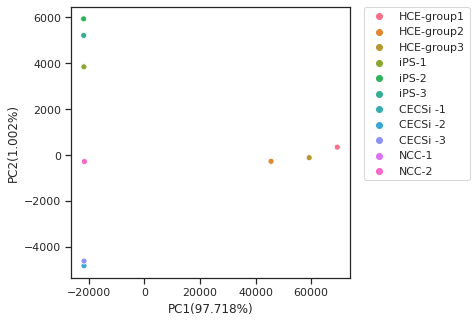

In [29]:
# Plot
sns.set() 
sns.set_style('ticks')
fig, ax = plt.subplots(figsize = (5,5))
[pc1, pc2] = model.explained_variance_ratio_[0:2]
PC1 = round(100*pc1, 3)
PC2 = round(100*pc2, 3)
sns.scatterplot(x="PCA1", y="PCA2", data=Rdata, hue=Rdata.index)
ax.set(xlabel=f"PC1({PC1}%)",ylabel=f"PC2({PC2}%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)